# 5.3 Lab: Cross-Validation and the Bootstrap

To run in Colab,
* click this button
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ssuai/machine_learning/blob/main/lab4_resampling.ipynb)
* run the following cell

In [ ]:
# clone the data folder
!git clone https://github.com/ssuai/machine_learning_data.git data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Auto data

In [2]:
Auto = pd.read_csv("data/Auto.csv")
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
# more info
Auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [4]:
# replace '?' in hoursepower with NaN
Auto.replace(to_replace='?', value=np.nan, inplace=True)
Auto.horsepower=np.float64(Auto.horsepower)
print(Auto.shape)

# drop sample with nan
Auto.dropna(axis=0, how='any', inplace=True)
print(Auto.shape)

(397, 9)
(392, 9)


In [5]:
Auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

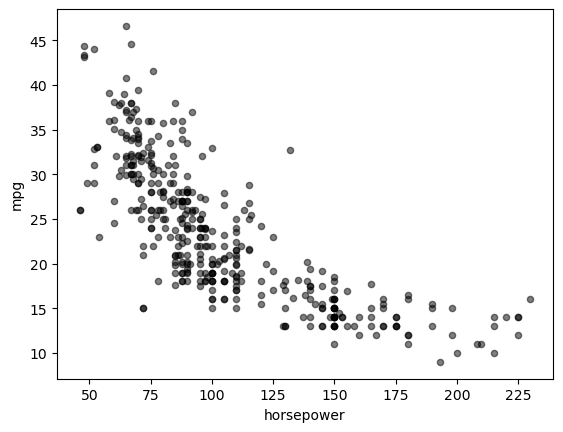

In [6]:
Auto.plot.scatter('horsepower', 'mpg', color='k', alpha=0.5)

## 5.3.1 The Validation Set Approach


In [7]:
# sklearn has spliting method!
from sklearn.model_selection import train_test_split
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

train_set, test_set = train_test_split(Auto, test_size=0.5)
print(train_set.shape)
print(test_set.shape)

(196, 9)
(196, 9)


### Linear regression

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_set.horsepower.values.reshape(-1, 1), train_set.mpg)
mpg_pred = model.predict(test_set.horsepower.values.reshape(-1, 1))

In [9]:
# calculate MSE and RMSE
from sklearn import metrics

print ("The MSE is: {:.3}".format( metrics.mean_squared_error(test_set.mpg, mpg_pred) )  )
print ("The RMSE is: {:.3}".format( np.sqrt( metrics.mean_squared_error(test_set.mpg, mpg_pred))))

The MSE is: 21.9
The RMSE is: 4.68


Text(0, 0.5, 'estimated mpg')

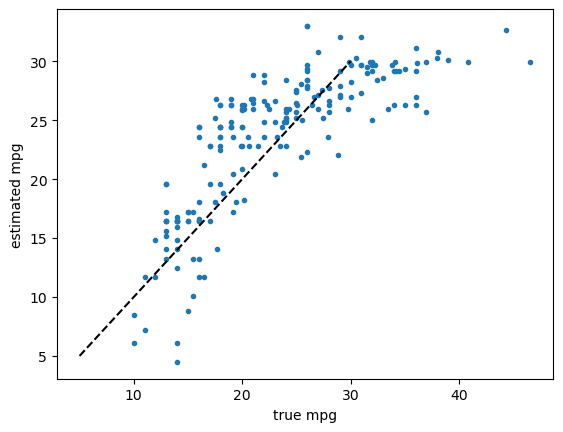

In [10]:
plt.plot(test_set.mpg, mpg_pred, '.')
plt.plot((5,30),(5,30), 'k--')
plt.xlabel('true mpg')
plt.ylabel('estimated mpg')

### [TODO] Re-fit with higher order polynomials  and compare MSEs

## 5.3.2 Leave-One-Out Cross-Validation

24.231513517929233


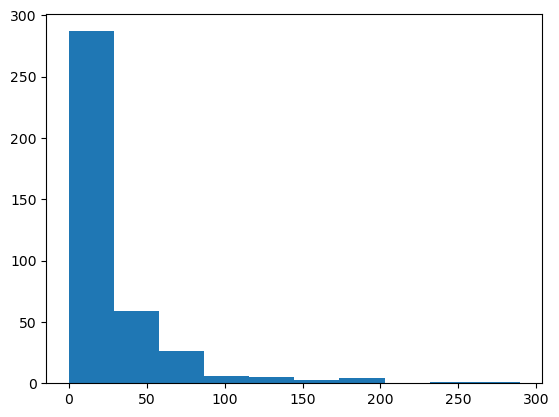

In [11]:
from sklearn.model_selection import LeaveOneOut
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html
# http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

model = LinearRegression()
    
loo = LeaveOneOut()
MSEs = list()
for train_idx, test_idx in loo.split(Auto):
    #print("%s %s" % (train_idx, test_idx))

    # split the data into two 
    train_set = Auto.iloc[train_idx]
    test_set = Auto.iloc[test_idx]
    
    model.fit(train_set.horsepower.values.reshape(-1, 1), train_set.mpg)
    mpg_pred = model.predict(test_set.horsepower.values.reshape(-1, 1))

    MSEs.append(metrics.mean_squared_error(test_set.mpg, mpg_pred))


# plot histogram
plt.hist(MSEs)

# calc mean
print(np.mean(MSEs))




## 5.3.3 k-Fold Cross-Validation

24.259489367942763


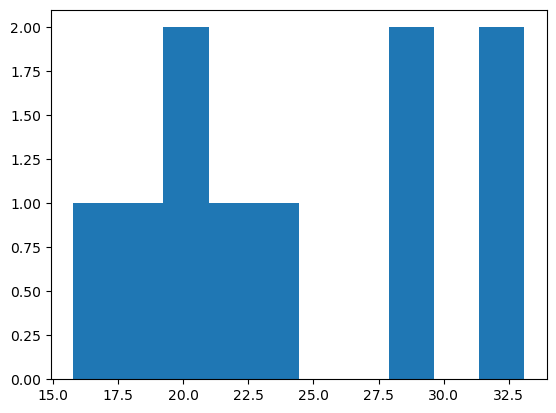

In [12]:
from sklearn.model_selection import KFold
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html  
# http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

model = LinearRegression()
    
kf = KFold(n_splits=10, shuffle=True)

MSEs = list()
for train_idx, test_idx in kf.split(Auto):
    #print("%s %s" % (train_idx, test_idx))

    # split the data into two 
    train_set = Auto.iloc[train_idx]
    test_set = Auto.iloc[test_idx]
    
    model.fit(train_set.horsepower.values.reshape(-1, 1), train_set.mpg)
    mpg_pred = model.predict(test_set.horsepower.values.reshape(-1, 1))

    MSEs.append(metrics.mean_squared_error(test_set.mpg, mpg_pred))


# plot histogram
plt.hist(MSEs)

# calc mean
print(np.mean(MSEs))



### Short version using sklearn!

In [13]:
from sklearn.model_selection import cross_val_score
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
# http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

model = LinearRegression()
scores = cross_val_score(model, Auto.horsepower.values.reshape(-1, 1), Auto.mpg, cv=10, scoring='neg_mean_squared_error')
mse_scores = -scores
print(mse_scores)
print("10-Fold CV MSE = %.3f" % (np.array(mse_scores).mean()))

[28.34783584 17.22640854 26.92535793 23.36016122 15.55763304 17.89383456
 17.04476867 22.83657872 65.93489567 39.27186233]
10-Fold CV MSE = 27.440


### [TODO] Re-fit with higher order polynomials  and compare MSEs

## 5.3.4 The Bootstrap

In [14]:
# load Portfolio dataset
Portfolio = pd.read_csv("data/Portfolio.csv", index_col=0)
Portfolio.head()

,X,Y
1,-0.895251,-0.234924
2,-1.562454,-0.885176
3,-0.417090,0.271888
4,1.044356,-0.734198
5,-0.315568,0.841983


<AxesSubplot:xlabel='X', ylabel='Y'>

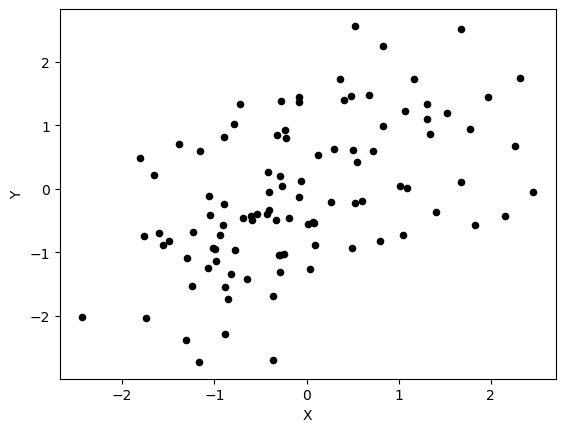

In [15]:
Portfolio.plot.scatter('X', 'Y', color='k')

In [16]:
# function to estimate alpha from data pairs (X,Y)
def estimate_alpha(data,index):
    # select data by index
    X=data.iloc[index].X
    Y=data.iloc[index].Y
    
    # calc variance and covariance
    covMat = np.cov(X,Y)
    varX = covMat[0][0]
    varY = covMat[1][1]
    covXY = covMat[0][1]

    return (varY-covXY)/(varX+varY-2*covXY)


In [17]:
# estimate alpha using all the samples
estimate_alpha(Portfolio, range(100))

0.57583207459283

0.5780465075446075
0.0890521297821283


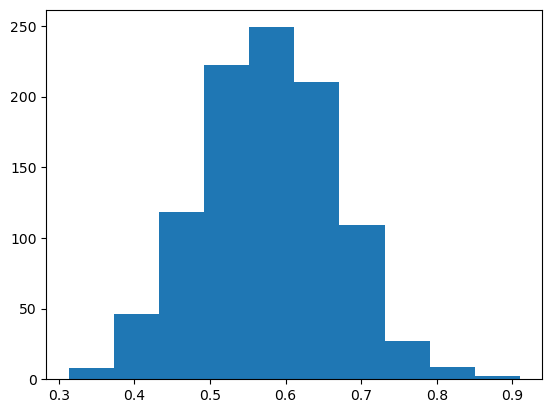

In [18]:
# repeat B=1000 times random sample with replacement
B=1000
alphas=list()
for b in range(B):
    index = np.random.choice(range(100),100)
    alphas.append(estimate_alpha(Portfolio,index))

# plot histogram of estimates
plt.hist(alphas)

# mean and std of estimates 
print(np.mean(alphas))
print(np.std(alphas))

In [19]:
## [ToDo] Calculate bootstrap standard errors of linear regression for Auto data